In [2]:
!pip install -q mtcnn
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

In [3]:
def extract_face_regions_and_cropped_face( model, im, resize_face = False, resize_patch = False, face_size=(128,128), patch_size=(32,32)):
    # detect face in the image
    dtct = model.detect_faces(im)

    # skip cases where we could not detect a face
    if len(dtct) == 0:
      return None, None, None, None, None 

    # extract details of the face
    x1, y1, width, height = dtct[0]['box']
    # force detected pixel values to be positive (bug fix)
    x1, y1 = abs(x1), abs(y1)
    # convert into coordinates
    x2, y2 = x1 + width, y1 + height
    # retrieve face pixels
    face_pixels = im[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face_pixels)
    if resize_face:
      image = image.resize(face_size)
    face_array = np.asarray(image)


    dtct = model.detect_faces(im)
    x, y, w, h = dtct[0]['box']
    lex, ley = dtct[0]['keypoints']['left_eye']
    rex, rey = dtct[0]['keypoints']['right_eye']
    mlx, mly = dtct[0]['keypoints']['mouth_left']
    mrx, mry = dtct[0]['keypoints']['mouth_right']
    nx, ny = dtct[0]['keypoints']['nose']

    #extract mouth 
    a = (mry + mly)/2
    this_y = int(round((a + ny)/2 ))
    this_x = int(round(mlx - 10 ))
    this_h = int(round(a - ny)+10)
    this_w = int(round((mrx- mlx) + 20))
    mouth = im[ this_y: this_y+this_h, this_x : this_x+this_w]

    mouth = Image.fromarray(mouth)
    if resize_patch:
      mouth = mouth.resize(patch_size)
    mouth = np.asarray(mouth)

    #extract nose 
    this_y = int(round( (rey + ley)/2 ))
    this_x = int(round( (lex + nx)/2 - 10))
    this_h = int(round( ny - (rey + ley)/2 + 30 ))
    this_w = int(round( (ny - lex)/2 + (rex - ny)/2 + 30 ))
    nose = im[ this_y: this_y+this_h, this_x : this_x+this_w]

    nose = Image.fromarray(nose)
    if resize_patch:
      nose = nose.resize(patch_size)
    nose = np.asarray(nose)

    #extract left eye 
    this_x = int(round( x + 10))
    this_xend = int(round( (lex + rex)/2 ))
    this_y = int(round( ley - 40  ))
    this_yend = int(round( ley + 20))
    left_eye = im[ this_y: this_yend, this_x : this_xend]

    left_eye = Image.fromarray(left_eye)
    if resize_patch:
      left_eye = left_eye.resize(patch_size)
    left_eye = np.asarray(left_eye)

    #extract right eye 
    this_xend = int(round( x + w - 10))
    this_x = int(round( (lex + rex)/2 ))
    this_y = int(round( rey - 40  ))
    this_yend = int(round( rey + 20))
    right_eye = im[ this_y: this_yend, this_x : this_xend]

    right_eye = Image.fromarray(right_eye)
    if resize_patch:
      right_eye = right_eye.resize(patch_size)
    right_eye = np.asarray(right_eye)

    return face_array, mouth, nose, left_eye, right_eye

In [5]:
cropper = MTCNN()
img1 = mpimg.imread('save2.jpg') 
img2 = mpimg.imread('face.jpg') 

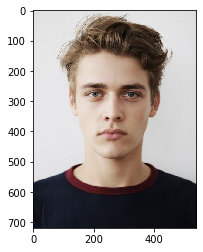

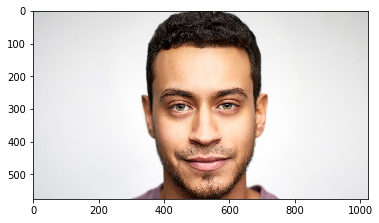

In [6]:
plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img2)

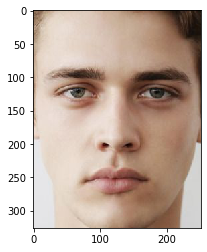

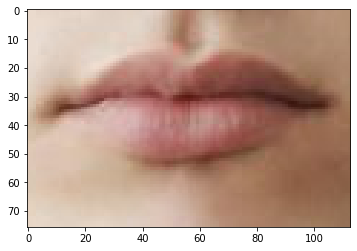

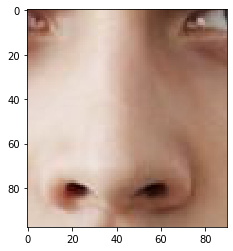

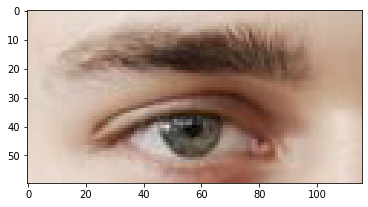

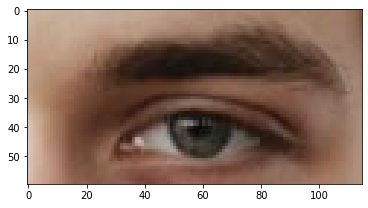

In [7]:
face, mouth, nose, left_eye, right_eye = extract_face_regions_and_cropped_face( cropper, img1)
plt.imshow(face)
plt.figure()
plt.imshow(mouth)
plt.figure()
plt.imshow(nose)
plt.figure()
plt.imshow(left_eye)
plt.figure()
plt.imshow(right_eye)

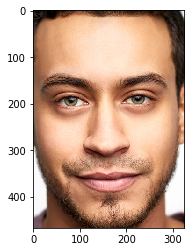

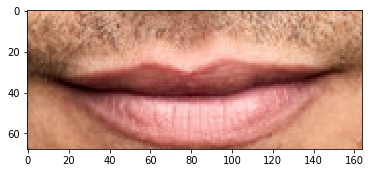

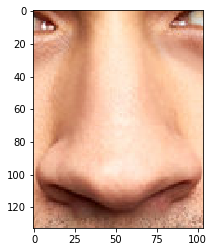

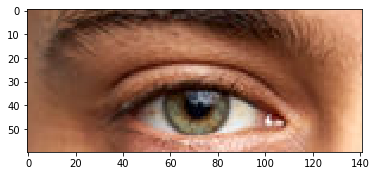

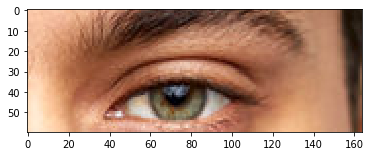

In [8]:
face, mouth, nose, left_eye, right_eye = extract_face_regions_and_cropped_face( cropper, img2)
plt.imshow(face)
plt.figure()
plt.imshow(mouth)
plt.figure()
plt.imshow(nose)
plt.figure()
plt.imshow(left_eye)
plt.figure()
plt.imshow(right_eye)